# A short introduction to `numpy`, `scipy` and `matplotlib`

## TOC
* [python arrays (`numpy`)](#numpy)
* [visualizing data and models (`matplotlib`)](#matplotlib)
* [fitting a simple (linear) model on data](#fit)
* [computing integrals](#integrals)
* [integrating ordinary differential equations](#ode)

<a id="numpy"> </a>
## Python arrays : the numpy module

The `numpy` module defines N-dimensional arrays, along with a large number of functions to manipulate these arrays. It allows very fast operations on vectors and matrices (search, comparison, vector operations, linear algebra). 

Their interface of `numpy` arrays is very similar to that of lists, except that they store objects of the same type, in order to allow for efficient storage and fast retrieval of array values.

### Creating arrays

In [39]:
import numpy as np

a = np.array([1,2,3.])
x = np.zeros(20)
y = np.ones(20)

print(a)
print(x)
print(y)

[1. 2. 3.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
x = np.arange(-10., 10., 1.)
print(len(x))
print(x)

20
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]


In [14]:
x = np.linspace(-10., 10., 20)
print(len(x))
print(x)

20
[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


### Operations on arrays

In [26]:
# We may add, subtract, multiply, divide etc... arrays like we would do with scalars

x = np.linspace(0., 45., 20)
x *= (np.pi / 180.)
y = np.random.normal(scale=0.01, size=20)
x = x + y

# numpy (and many other modules) also defines functions that apply simultaneously to all elements of an array
z = 1. / np.cos(x)
print(z)

[1.00005003 1.0009033  1.00421503 1.00771334 1.01717416 1.02171122
 1.0310421  1.04755622 1.05649811 1.0685127  1.09169636 1.11525785
 1.14691638 1.16718671 1.18144309 1.22430338 1.26814466 1.30427999
 1.36721398 1.42894861]


### 2-D arrays

In [34]:
M = np.array([[1, 2, 3], [4, 5, 6.]])
N = np.random.random((100,100))

print(M.shape)
print (N.shape)

(2, 3)
(100, 100)


### Accessing array elements - slicing arrays

In [60]:
A = np.linspace(0., 10., 100)
N = np.random.random((100,100))

x,y = A[2], A[2:55:2]
z,t = N[55,22], N[2:3,2:55:3]

print('x=', x)
print('y=', y)
print('z=', z)
print('t=', t)

('x=', 0.20202020202020202)
('y=', array([0.2020202 , 0.4040404 , 0.60606061, 0.80808081, 1.01010101,
       1.21212121, 1.41414141, 1.61616162, 1.81818182, 2.02020202,
       2.22222222, 2.42424242, 2.62626263, 2.82828283, 3.03030303,
       3.23232323, 3.43434343, 3.63636364, 3.83838384, 4.04040404,
       4.24242424, 4.44444444, 4.64646465, 4.84848485, 5.05050505,
       5.25252525, 5.45454545]))
('z=', 0.21886659977899725)
('t=', array([[0.9044724 , 0.91971164, 0.03851509, 0.31487907, 0.9019645 ,
        0.0310156 , 0.68101716, 0.93527416, 0.18606275, 0.22732074,
        0.11849781, 0.59360811, 0.23065952, 0.03821048, 0.83502566,
        0.27193694, 0.33696253, 0.58225922]]))


### Linear algebra with arrays

In [129]:
M = np.random.random((100,100))
B = np.random.random(100)

# matrix - vector multiplication
U = np.dot(M,B)

# solving for M X = B
from numpy import linalg
X = linalg.solve(M, B)
print("X=%r\nRES=%r" % (X[:10], (np.dot(M,X) - B)[:10]))

X=array([-0.37832968, -0.09430852,  0.26083515, -0.13792211, -0.10759413,
       -0.71488558,  0.53764682,  0.69003217,  0.86843615,  0.0619745 ])
RES=array([-1.33226763e-15, -7.77156117e-16, -2.33146835e-15, -8.88178420e-16,
        6.66133815e-16,  8.88178420e-16,  6.66133815e-16, -5.55111512e-15,
       -2.99760217e-15, -6.66133815e-16])


In [130]:
# eigenvectors and eigenvalues

# let's build a symmetric matrix
A = np.dot(M.T, M)
evals, evecs = linalg.eig(A)
print evals[0:10]

[2466.41783729   31.48168274   28.83053537   28.48556869   27.57436366
   26.86576411   25.53942995   24.83648416   23.92509353   23.15746823]


*** 

<a id="matplotlib"></a>
## Visualizing data and models

Many libraries allow one to represent graphically data and functions. Here, we will present the de-facto standard, which is `matplotlib`

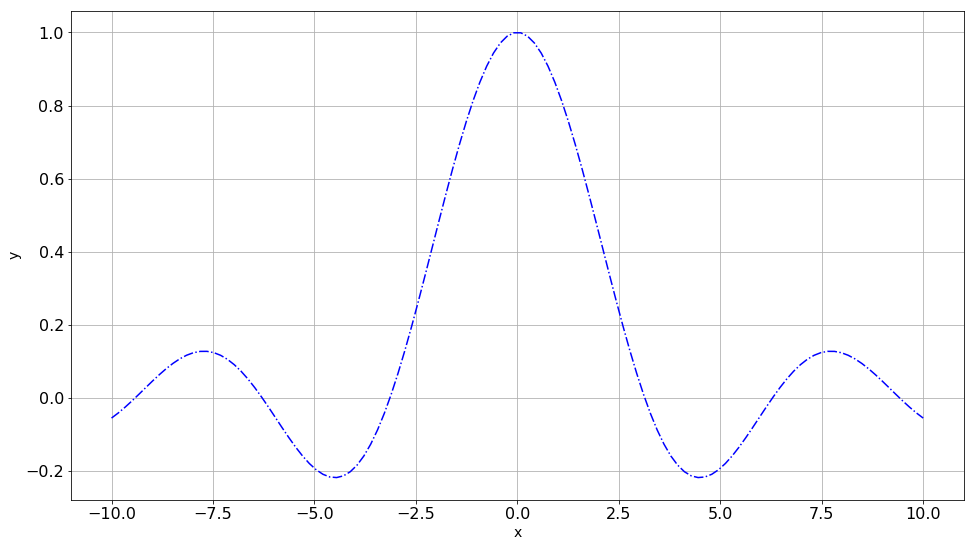

In [322]:
import matplotlib
import matplotlib.pyplot as pl
pl.rcParams.update({'font.size': 16})

pl.figure(figsize=(16,9))
x = np.linspace(-10., 10., 120)
y = np.sin(x)/x
pl.plot(x, y, 'b-.')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)
pl.grid()

Text(0,0.5,'y')

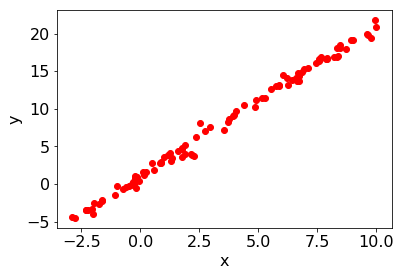

In [323]:
# let's create some data and present it corresponds to a series of measurements of some linear law
x = np.random.uniform(-3., 10., size=100)
y = 2. * x + 1.1

# we should add noise
yerr = np.random.uniform(0.2, 1., size=100)
# yerr = 0.5 * np.ones(100)
n = np.random.normal(scale=yerr, size=100)
y += n

pl.plot(x, y, 'ro')
pl.xlabel('x')
pl.ylabel('y')

Text(0,0.5,'y')

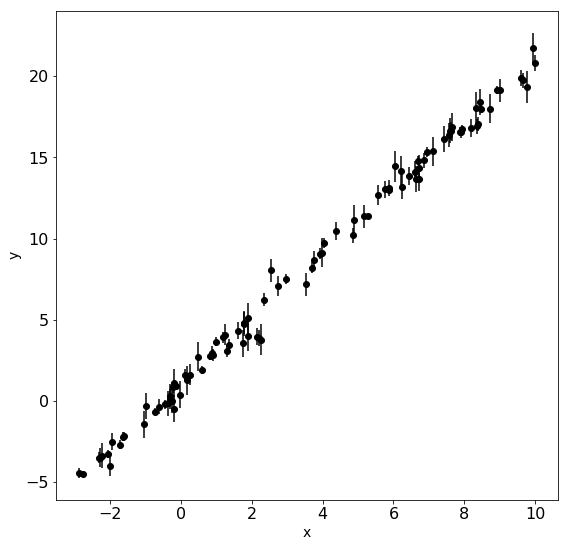

In [325]:
# It is better to plot the data with errorbars (and on a larger figure)
pl.figure(figsize=(9,9))
pl.errorbar(x, y, yerr=yerr, ls='', marker='o', color='k')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)

<a id="fit"></a>
## Fitting a simple, linear model on data

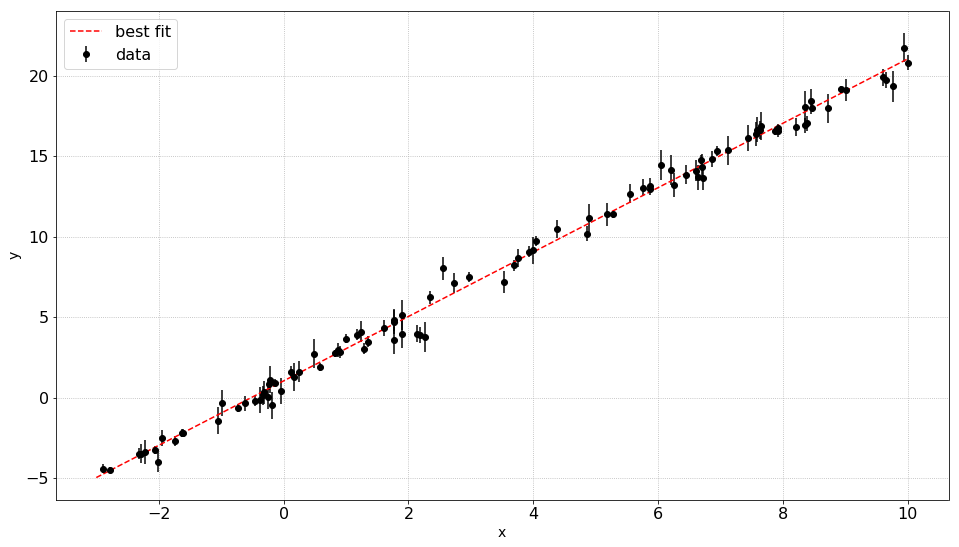

In [328]:
# Now, let's model it with a linear law
r = np.polyfit(x,y, deg=1)

# it is always better to add some weights
w = 1. / yerr**2
r = np.polyfit(x, y, deg=1, w=w)

pl.figure(figsize=(16,9))
xx = np.linspace(-3., 10., 100)
pl.errorbar(x, y, yerr=yerr, ls='', marker='o', color='k', label='data')
pl.plot(xx, np.polyval(r, xx), 'r--', label='best fit')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)
pl.legend(loc='upper left')
pl.grid(1, ls=':')

Text(0.5,0,'residuals')

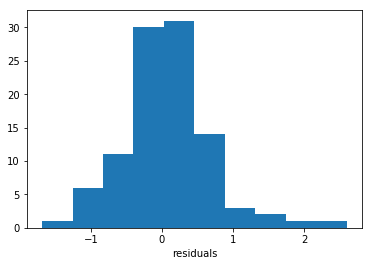

In [246]:
# we can have a look at the residuals
residuals = y - np.polyval(r, x)
pl.figure()
pl.hist(residuals, bins=10)
pl.xlabel('residuals')

Chi2=115.844795  Reduced Chi2=1.182090


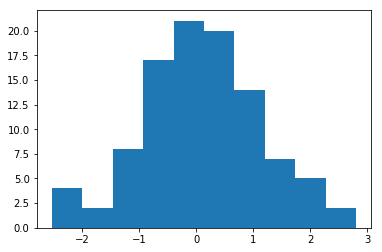

In [247]:
# the pulls
pl.hist(residuals / yerr, bins=10)
chi2 = ((residuals / yerr)**2).sum()
ndof = len(residuals) - 2
reduced_chi2 = chi2 / ndof
print("Chi2=%f  Reduced Chi2=%f" % (chi2, reduced_chi2))

In [248]:
import scipy.optimize as optimize

def f(p, x):
    return p[0] * x + p[1]

def errfunc(p,x, y, err):
    return (f(p,x) - y) / err

p0 = np.zeros(2)
p0[0], p[1] = 0.1, 0.1

p, success = optimize.leastsq(errfunc, p0, args=(x,y,yerr))
print p, success

[2.00354656 0.99934123] 1


Text(0,0.5,'y')

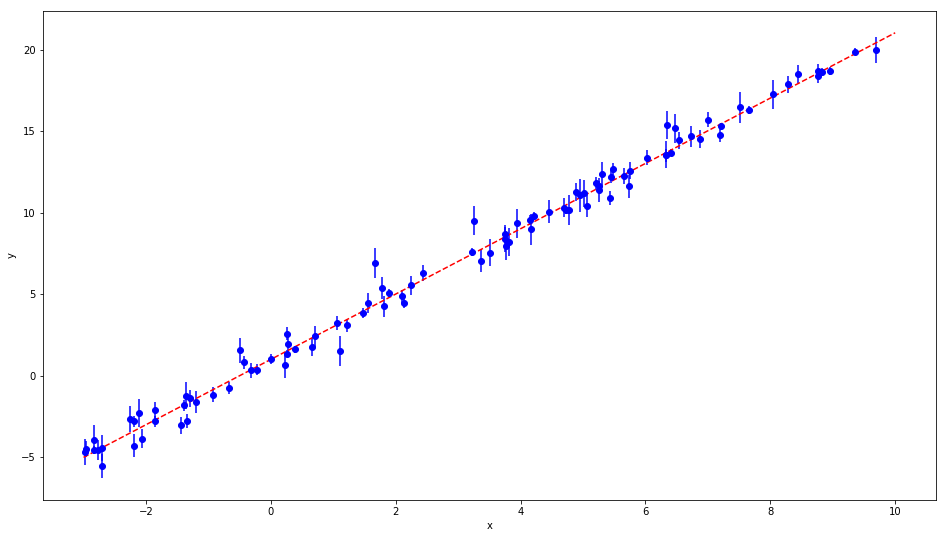

In [249]:
pl.figure(figsize=(16,9))
pl.errorbar(x, y, yerr=yerr, ls='', marker='o', color='b')
pl.plot(xx, f(p,xx), 'r--')
pl.xlabel('x')
pl.ylabel('y')

Chi2=115.844795 Reduced chi2=1.182090


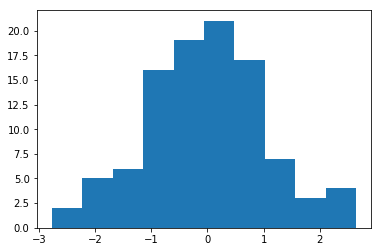

In [250]:
pulls = errfunc(p,x,y,yerr)
pl.hist(pulls, bins=10)
Chi2 = pulls.sum()
ndof = len(x) - 2
print('Chi2=%f Reduced chi2=%f' % (chi2, chi2/ndof))

In [251]:
J = np.array([x, np.ones(len(x))]).T
W = np.diag(1. / yerr**2)
A = np.dot(J.T, W).dot(J)
B = np.dot(J.T, W).dot(y)
print J.shape, A.shape, B.shape, type(W)
p = linalg.solve(A, B)

(100, 2) (2, 2) (2,) <type 'numpy.ndarray'>


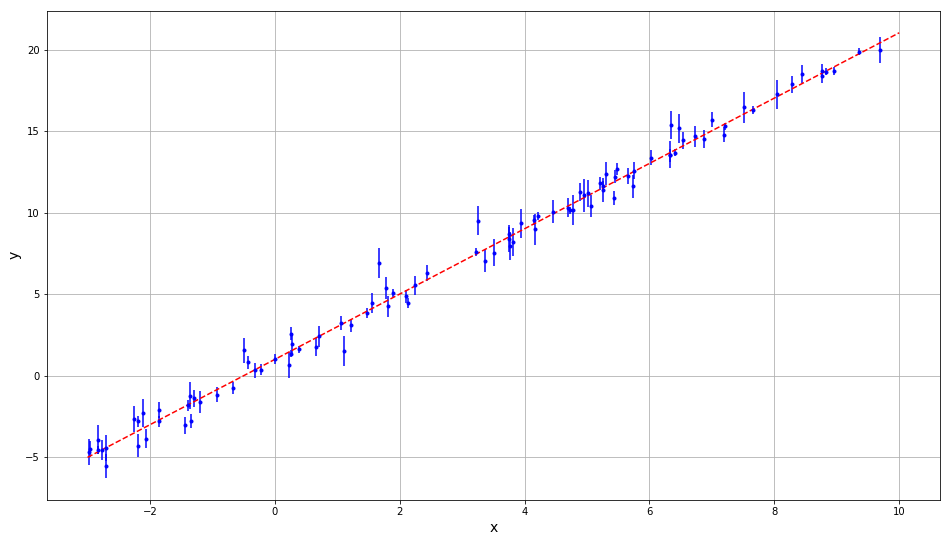

In [252]:
pl.figure(figsize=(16,9))
pl.errorbar(x, y, yerr=yerr, ls='', color='b', marker='.')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)
pl.plot(xx, p[0] * xx + p[1], 'r--')
pl.grid(1)

Chi2=115.077194 Reduced chi2=1.174257


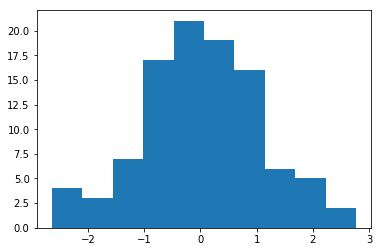

In [253]:
residuals = y - p[0] * x - p[1]
pulls = residuals / yerr
chi2 = (pulls**2).sum()
ndof = len(x) - 2
pl.figure()
pl.hist(pulls, bins=10)
print('Chi2=%f Reduced chi2=%f' % (chi2, chi2/ndof))

<a id="integrals"></a>
## Computing integrals

10.6348337074 1.50547390214e-10


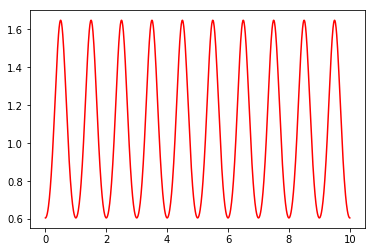

In [258]:
import scipy.integrate as integrate

def f(x):
    return np.exp(-0.5 * np.cos(2 * np.pi * x))

xx = np.linspace(0., 10., 1000)
pl.plot(xx, f(xx), 'r-')

v, err = integrate.quad(f, 0., 10.)
print v, err

*** 

<a id="ode"></a>
## Integrating ordinary differential equations

Differential equation:

$$
y'+ y = x, \ \ \mathrm{with}\ \ y(0) = 1
$$

In [274]:
import scipy.integrate as integrate

def dy_dx(y, x):
    return x - y

xx = np.linspace(0., 5., 100)
y0 = 1.
yy = integrate.odeint(dy_dx, y0, xx)

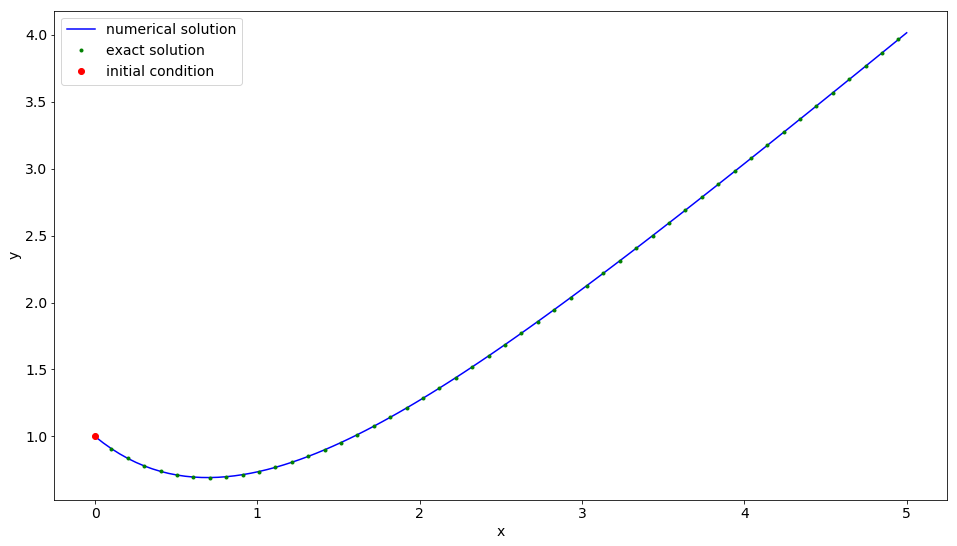

In [275]:
# now, we plot the result of our numerical integration
# and compare it with the exact solution (by chance, has one)

def exact_solution(x):
    return x - 1. + 2. * np.exp(-x)

pl.rcParams.update({'font.size': 14})
pl.figure(figsize=(16,9))
pl.plot(xx, yy, 'b-', label='numerical solution')
pl.plot(xx[::2], exact_solution(xx[::2]), 'g.', label='exact solution')
pl.plot(0., y0, 'ro', label='initial condition')
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='upper left')

Text(0,0.5,'exact-numerical')

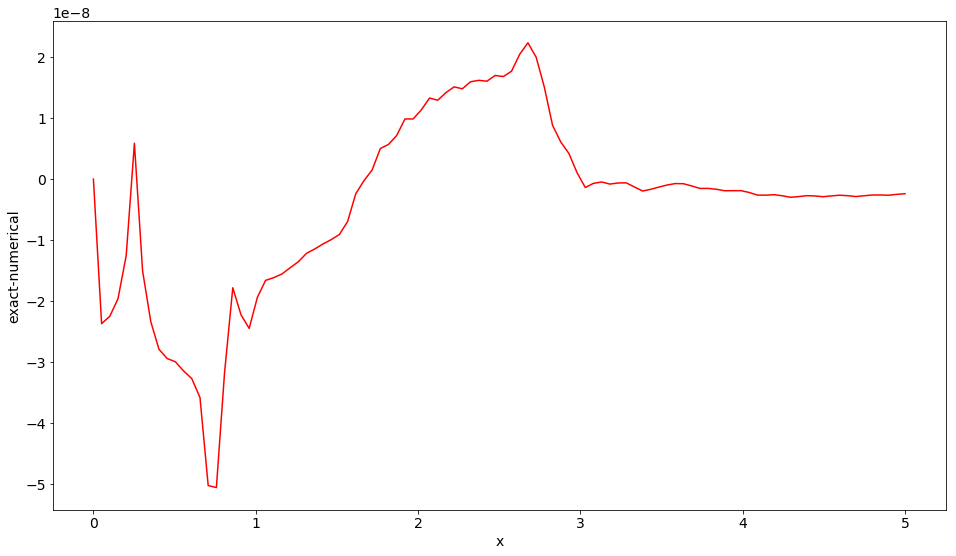

In [278]:
# pretty close ! 
# let's compare the exact and numerical solutions more closely
pl.figure(figsize=(16,9))
pl.plot(xx, exact_solution(xx)-yy.flatten(), 'r-')
pl.xlabel('x')
pl.ylabel('exact-numerical')

In [279]:
# what if the boundary condition is not at zero ? 
# for example: $y(2) == 2$
# the solution I know, is to solve backwards and forwards

xx_forwards  = np.linspace(2, 10, 100)
yy_forwards = integrate.odeint(dy_dx, 2., xx_forwards)
xx_backwards = np.linspace(2,  0., 50)
yy_backwards = integrate.odeint(dy_dx, 2., xx_backwards)

(0, 10.0)

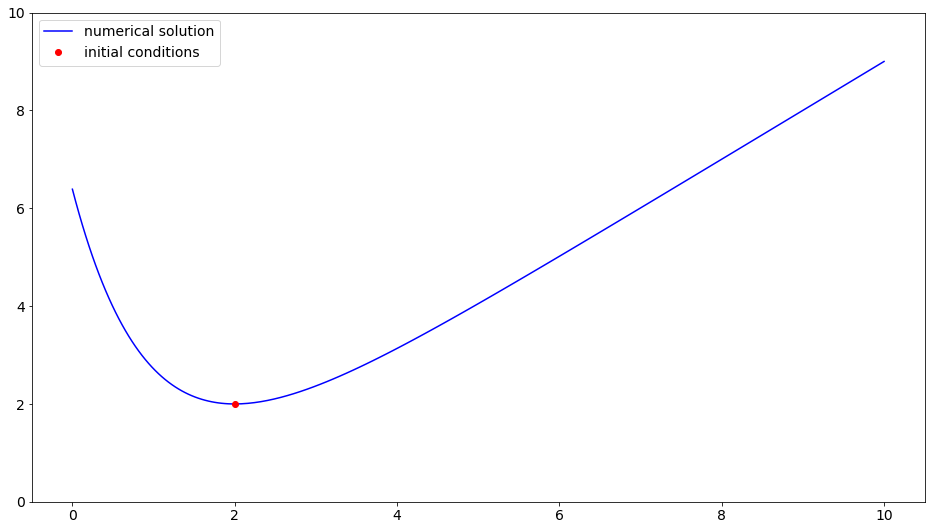

In [284]:
pl.figure(figsize=(16,9))
pl.plot(xx_forwards, yy_forwards, 'b-', label='numerical solution')
pl.plot(xx_backwards, yy_backwards, 'b-')
pl.plot(2., 2., 'ro', label='initial conditions')
pl.legend(loc='upper left')
pl.ylim((0, 10.))

### Second order ordinary differential equations

Finally, let's consider a second order differential equation, such as, for example, the pendulum equation:

$$
\theta''(t) + b \theta'(t) + c \sin\theta(t) = 0
$$

it may be solved with `odeint` provided that we express it as a first order ordinary differential equation. Classically, this is done as follows:

$$
\begin{bmatrix} \theta \\ \theta' \end{bmatrix}' = \begin{bmatrix} \theta' \\ -b \theta' -c \sin\theta\end{bmatrix} = \mathbf{F}\left(\begin{bmatrix} \theta \\  \theta' \end{bmatrix}\right)
$$

In [313]:
def dy_dx(y, t, b, c):
    theta, d_theta_dt = y
    return [d_theta_dt, -b * d_theta_dt -c * np.sin(theta)]

b, c = 0.25, 5.
y0 = [np.pi-0.1, 0.]
t = np.linspace(0., 10, 100)
y = integrate.odeint(dy_dx, y0, t, args=(b, c,))

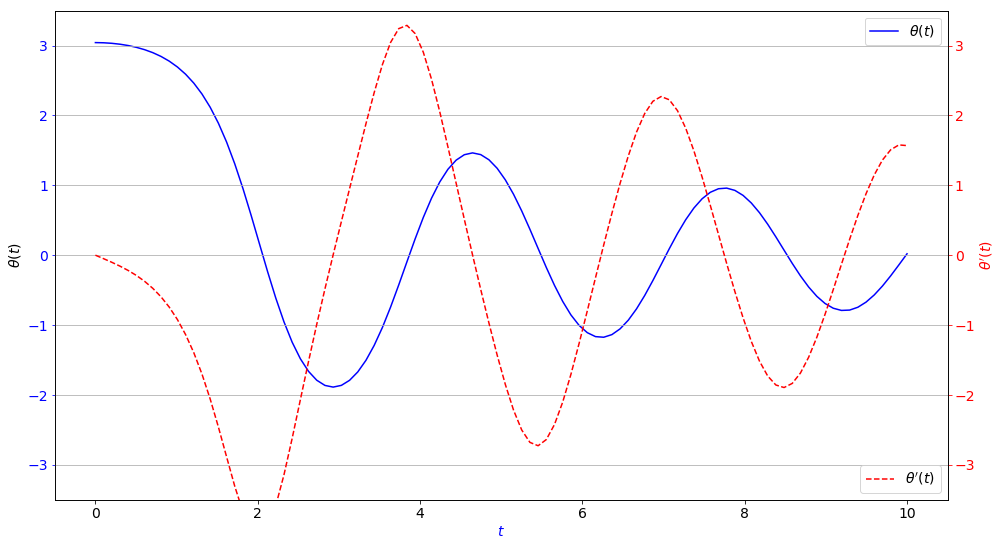

In [319]:
pl.figure(figsize=(16,9))
ax = pl.subplot(111)
pl.plot(t, y.T[0], 'b-', label='$\\theta(t)$')
pl.xlabel('$t$', color='b')
pl.ylabel('$\\theta(t)$')
pl.legend(loc='upper right')
pl.ylim((-3.5,3.5))
ax.tick_params('y', colors='b')

ax2 = pl.twinx()
ax2.plot(t, y.T[1], 'r--', label="$\\theta'(t)$")
pl.ylabel("$\\theta'(t)$", color='r')
pl.legend(loc='lower right')
pl.ylim((-3.5,3.5))
ax2.tick_params('y', colors='r')
pl.grid(1)